# Data visualization урок

---
### Завдання:
До заданого датасету зробити візуалізацуію даних та додати нові фічі в ручному режимі

---
<a name="0"/>

### Зміст
* 1.[Імпорт даних](#1)
* 2.[Первинний аналіз](#2)
  * 2.1 [Датасет **player_data**](#2.1)

  * 2.2 [Датасет **players**](#2.2)

  * 2.3 [Датасет **seasons_stats**](#2.3)

  * 2.4 [Об'єднаня датасетів **player_data**, **players**](#2.4)
* 3.[Візуалізація](#3)
  * 3.1 [Однофакторна візуалізація](#3.1)
  * 3.2 [Візуалізація категоріальних та бінарних фічь](#3.2)
  * 3.3 [Багатофакторна візуалізація](#3.3)
 


Імпорт бібліотек

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

Налаштування

In [3]:
sns.set()

# Графіка у форматі SVG більш чітка та розбірлива
%config InlineBackend.figure_format = 'svg'

---
<a name="1"/>

# 1. Імпорт данних
[зміст](#0)


In [5]:
# Посилання на архів
url = 'https://lms.ithillel.ua/api/lms/files/634123df2fa78f4b3a6f534e'

In [9]:
resp = urlopen(url)
myzip = ZipFile(BytesIO(resp.read()))
with myzip.open('player_data.csv') as myfile:
    #print(myfile.readline())
    player_data = pd.read_csv(myfile)

with myzip.open('Players.csv') as myfile:
    #print(myfile.readline())
    players = pd.read_csv(myfile)

with myzip.open('Seasons_Stats.csv') as myfile:
    #print(myfile.readline())
    seasons_stats = pd.read_csv(myfile)

In [11]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [12]:
seasons_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


---
<a name="2"/>

# 2. Первинний аналіз
[зміст](#0)

<a name="2.1"/>

### 2.1. Датасет **player_data**
[зміст](#0)


In [13]:
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [14]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [15]:
player_data.describe(include='all')

,name,year_start,year_end,position,height,weight,birth_date,college
count,4550,4550.000000,4550.000000,4549,4549,4544.000000,4519,4248
unique,4500,NaN,NaN,7,28,NaN,4161,473
top,George Johnson,NaN,NaN,G,6-7,NaN,"October 25, 1948",University of Kentucky
freq,3,NaN,NaN,1574,473,NaN,3,99
mean,NaN,1985.076264,1989.272527,NaN,NaN,208.908011,NaN,NaN
std,NaN,20.974188,21.874761,NaN,NaN,26.268662,NaN,NaN
min,NaN,1947.000000,1947.000000,NaN,NaN,114.000000,NaN,NaN
25%,NaN,1969.000000,1973.000000,NaN,NaN,190.000000,NaN,NaN
50%,NaN,1986.000000,1992.000000,NaN,NaN,210.000000,NaN,NaN
75%,NaN,2003.000000,2009.000000,NaN,NaN,225.000000,NaN,NaN


---

Маємо такі фічі, та іх приблизний опис і значення:

|  Назва фічі  | Опис | Тип значення | Статистичне значення  |Розмірність |
|---         |---       |---   |---  |---
|name | ім'я гравця | Текст | унікальне | -
|year_start | початок кар'єри | Число | Кількісне | рік
|year_end | кінець кар'єри | Число | Кількісне | рік
|position | ігрова позиція | Текст | Категоріальне | -
|height | зріст гравця | Текст | Категоріальне | фути-дюйми
|weight | вага гравця | Число | Кількісне | фунти
|birth_date | дата народження | Текст | унікальне | -
|college | місце навчання | Текст | Категоріальне | -

Це загальна інформація про гравців.
* Особистої інформації: університет, зріст, вага, дата народження;
* Як гравця: дата початку та кінця кар'єри, ігрова позиція.

---

Також є декілька гравців з однаковими іменами.
Для об'єданя з іншими датасетами зробити унікальний індекс з імені та дати нарождення.

Змінемо типи данних стобчиків `player_data`

In [16]:
player_data['year_start'] = player_data['year_start'].astype('int16')
player_data['year_end'] = player_data['year_end'].astype('int16')
player_data['position'] = player_data['position'].astype('category')
player_data['height'] = player_data['height'].astype('category')
player_data['weight'] = player_data['weight'].astype('float16')
player_data['college'] = player_data['college'].astype('category')
player_data['birth_date'] = player_data['birth_date'].astype('datetime64[ns]')

Створимо 3 колонки з днем, місяцем та роком народженя, заповнимо їх з колонки `birth_date`. Видалимо `birth_date`.

In [17]:
player_data['birth_day'] = player_data['birth_date'].apply(lambda x: x.day)
player_data['birth_month'] = player_data['birth_date'].apply(lambda x: x.month)
player_data['born'] = player_data['birth_date'].apply(lambda x: x.year)

In [18]:
# Видалимо колонку birth_date
player_data = player_data.drop(['birth_date'], axis=1)

Заповнюємо пропущєні значеня median'ою

In [19]:
player_data['weight'] = player_data['weight'].fillna(player_data['weight'].median())
player_data['birth_day'] = player_data['birth_day'].fillna(player_data['birth_day'].median())
player_data['birth_month'] = player_data['birth_month'].fillna(player_data['birth_month'].median())
player_data['born'] = player_data['born'].fillna(player_data['born'].median())

Змінюємо тип данних для нових фіч

In [20]:
player_data['birth_day'] = player_data['birth_day'].astype('int16')
player_data['birth_month'] = player_data['birth_month'].astype('int16')
player_data['born'] = player_data['born'].astype('int16')

Переіменуємо колонку `name` на `Player`

In [21]:
player_data = player_data.rename(columns={'name': 'Player'})

Додамо індекси `name` + `birth_day`

In [22]:
player_data.set_index(['Player','born'], inplace=True)

In [23]:
player_data.head()

,,year_start,year_end,position,height,weight,college,birth_day,birth_month
Player,born,,,,,,,,
Alaa Abdelnaby,1968,1991,1995,F-C,6-10,240.0,Duke University,24,6
Zaid Abdul-Aziz,1946,1969,1978,C-F,6-9,235.0,Iowa State University,7,4
Kareem Abdul-Jabbar,1947,1970,1989,C,7-2,225.0,"University of California, Los Angeles",16,4
Mahmoud Abdul-Rauf,1969,1991,2001,G,6-1,162.0,Louisiana State University,9,3
Tariq Abdul-Wahad,1974,1998,2003,F,6-6,223.0,San Jose State University,3,11


---
<a name="2.2"/>

### 2.2. Датасет **players**
[зміст](#0)


In [24]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [25]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.3+ KB


In [26]:
players.describe(include='all')

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
count,3922.000000,3921,3921.000000,3921.000000,3573,3921.00000,3452,3439
unique,NaN,3921,NaN,NaN,422,NaN,1264,128
top,NaN,Curly Armstrong,NaN,NaN,University of Kentucky,NaN,Chicago,California
freq,NaN,1,NaN,NaN,89,NaN,114,344
mean,1960.500000,NaN,198.704922,94.783219,NaN,1962.37975,NaN,NaN
std,1132.328206,NaN,9.269761,12.039515,NaN,20.33491,NaN,NaN
min,0.000000,NaN,160.000000,60.000000,NaN,1913.00000,NaN,NaN
25%,980.250000,NaN,190.000000,86.000000,NaN,1948.00000,NaN,NaN
50%,1960.500000,NaN,198.000000,95.000000,NaN,1964.00000,NaN,NaN
75%,2940.750000,NaN,206.000000,102.000000,NaN,1979.00000,NaN,NaN


Маємо такі фічі, та іх приблизний опис і значення:

|  Назва фічі  | Опис | Тип значення | Статистичне значення  |Розмірність |
|---         |---       |---   |---  |---
|Unnamed| індекс | числовий | калькісний | -
|Player| ім'я гравця | текст | унікальний | -
|height| зріст | числовий | кількісний | см
|weight| вага | числовий | кількісний | кг
|collage| індекс | тест | категоріальний | -
|born| індекс | числовий | кількісний | рік
|birth_city| індекс | текстовий | категоріальний | -
|birth_state| індекс | текстовий | категоріальний | -

Тут також описана особиста інформація про гравців.

---
Заповнимо nan стовбчиків `height`, `weight`, `born` медіанними значенями. Видалемо стовбчик `Unnamed: 0`

In [27]:
# Замінюємо медіаною
players['height'] = players['height'].fillna(players['height'].median())
players['weight'] = players['weight'].fillna(players['weight'].median())
players['born'] = players['born'].fillna(players['born'].median())

In [28]:
# Видалимо колонку Unnamed: 0
players = players.drop(['Unnamed: 0'], axis=1)

Змінимо типи даних фіч

In [29]:
# Перетворемо типи даних
players['height'] = players['height'].astype('float16')
players['weight'] = players['weight'].astype('float16')
players['collage'] = players['collage'].astype('category')
players['born'] = players['born'].astype('int16')
players['birth_city'] = players['birth_city'].astype('category')
players['birth_state'] = players['birth_state'].astype('category')

Створимо індекси `Player` та `born`

In [30]:
players.set_index(['Player','born'], inplace=True)

In [31]:
players.head()

,,height,weight,collage,birth_city,birth_state
Player,born,,,,,
Curly Armstrong,1918,180.0,77.0,Indiana University,NaN,NaN
Cliff Barker,1921,188.0,83.0,University of Kentucky,Yorktown,Indiana
Leo Barnhorst,1924,193.0,86.0,University of Notre Dame,NaN,NaN
Ed Bartels,1925,196.0,88.0,North Carolina State University,NaN,NaN
Ralph Beard,1927,178.0,79.0,University of Kentucky,Hardinsburg,Kentucky


---
<a name="2.3"/>

### 2.3. Датасет **seasons_stats**
[зміст](#0)

In [33]:
seasons_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [34]:
seasons_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [35]:
seasons_stats.describe(include='all')

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24624,24624,24616.000000,24624,24624.000000,18233.000000,24138.000000,24101.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
unique,NaN,NaN,3921,23,NaN,69,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Eddie Johnson,PF,NaN,TOT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,33,4966,NaN,2123,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,12345.000000,1992.594989,NaN,NaN,26.664405,NaN,50.837110,23.593375,1209.720317,12.479071,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7127.822084,17.429594,NaN,NaN,3.841892,NaN,26.496161,28.632387,941.146575,6.039014,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,NaN,NaN,18.000000,NaN,1.000000,0.000000,0.000000,-90.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,NaN,NaN,24.000000,NaN,27.000000,0.000000,340.000000,9.800000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12345.000000,1996.000000,NaN,NaN,26.000000,NaN,58.000000,8.000000,1053.000000,12.700000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18517.500000,2007.000000,NaN,NaN,29.000000,NaN,75.000000,45.000000,1971.000000,15.600000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000


В цьому датасеті описана статистика гравців по роках

Маємо такі фічі, та іх приблизний опис і значення:

|  Назва фічі  | Опис |
|---         |---  
|Year | Сезон
|Player| ім'я гравця
|Pos| Позиція
|Age| Вік
|Tm| Команда
|G| Ігри
|GS| Розпочаті ігри
|MP| Зіграні хвилини
|PER| Рейтинг ефективності гравця
|TS% | Влучність кидків %
|3Par |відсоток влучань триочкових кидків
|FTr |відсоток реалізації штрафних кидків
|ORB%|Відсоток підбирань у нападі
|DRB%|Відсоток підбирань у захисті
|TRB%|Загальний відсоток підбирань
|AST%|Відсоток результативних передач
|STL%|Відсоток перехоплень
|BLK%|Відсоток блок-шотів
|TOV%|Відсоток підбирань
|USG%| Відсоток використання
|blanl| Пустий
|OWS|частка перемог в атаці
|DWS|захисні виграшні передачі
|WS |виграшні передачі
|WS/48| Кількість виграних передач за 48 хвилин
|OBPM| Перевищєня замін
|DBPM| Захисні заміни
|BPM | Заміни
|VORP| Цінність над заміною
|FG | Польові голи
|FGA| Спроби взяття воріт
|FG%|  Відсоток влучань з гри
|3P| триочкові кидки з гри
|3PA| триочкові кидки - спроби триочкових кидків
|3P%| відсоток реалізації триочкових кидків
|2P | 2-очкові польові голи
|2PA| спроби 2-очкових кидків з гри
|2P%| Відсоток реалізації 2-очкових гольових ударів
|eFG%| Відсоток результативних кидків з гри
|FT| штрафні кидки
|FTA| Штрафні кидки - Спроби штрафних кидків
|FT%| відсоток реалізації штрафних кидків
|ORB| підбирання в нападі
|DRB| захисні підбирання
|TRB| загальні підбирання
|AST| передачі
|STL| перехоплення
|BLK| Блоки
|TOV| втрати
|PF | Персональні фоли
|PTS| Очки

---

Видаляэмо стовбчики `Unnamed: 0`, `blanl` та `blank2`

In [36]:
seasons_stats = seasons_stats.drop(['Unnamed: 0', 'blanl', 'blank2'], axis=1)

Визначаэмо дату нарожденя гравця. Створюєму нову фічу

In [37]:
seasons_stats['born'] = seasons_stats['Year'] - seasons_stats['Age']

Заповнюємо `nan` значеня стобчиків медіанними значенями.

In [38]:
def na_median(arr, column):
  # Замінюємо медіаною
  arr[column] = arr[column].fillna(arr[column].median())

In [40]:
seasons_stats_columns = ['Year', 'Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'born']

for col in seasons_stats_columns:
    na_median(seasons_stats, col)

Перетворюємо тип данних фіч. <br>
Хоча і потрібно розібраится які з цих стовбчиків даних статистики результативность є `float`, а які `int`, пропустимо це і перетрворимо усі на `float16`.

In [41]:
def convert_to(arr, column, datatype):
    arr[column] = arr[column].astype(datatype)

In [42]:
# Конвернуємо в int16
int_columns = ['Year', 'Age', 'born']

for ic in int_columns:
    convert_to(seasons_stats, ic, 'int16')

# Конвернуємо в category
category_columns = ['Player', 'Pos', 'Tm']
for cc in category_columns:
    convert_to(seasons_stats, cc, 'category')

# Конвернуємо в float16
float_columns = ['G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']
for fc in float_columns:
    convert_to(seasons_stats, fc, 'float16')

Створюємо індекс `Player` та `born`

In [43]:
seasons_stats.set_index(['Player','born'], inplace=True)

In [44]:
seasons_stats.head()

Year  Pos  Age   Tm     G   GS      MP        PER  \
Player          born                                                      
Curly Armstrong 1919  1950  G-F   31  FTW  63.0  8.0  1053.0  12.703125   
Cliff Barker    1921  1950   SG   29  INO  49.0  8.0  1053.0  12.703125   
Leo Barnhorst   1925  1950   SF   25  CHS  67.0  8.0  1053.0  12.703125   
Ed Bartels      1926  1950    F   24  TOT  15.0  8.0  1053.0  12.703125   
                1926  1950    F   24  DNN  13.0  8.0  1053.0  12.703125   

                           TS%      3PAr  ...       FT%   ORB    DRB    TRB  \
Player          born                      ...                                 
Curly Armstrong 1919  0.367920  0.064026  ...  0.705078  38.0  106.0  159.0   
Cliff Barker    1921  0.435059  0.064026  ...  0.708008  38.0  106.0  159.0   
Leo Barnhorst   1925  0.394043  0.064026  ...  0.698242  38.0  106.0  159.0   
Ed Bartels      1926  0.312012  0.064026  ...  0.559082  38.0  106.0  159.0   
                1926  0.308105  0.064026  ...  0.547852  38.0  106.0  159.0   

                        AST   STL   BLK   TOV     PF    PTS  
Player          born                                         
Curly Armstrong 1919  176.0  29.0  11.0  55.0  217.0  458.0  
Cliff Barker    1921  109.0  29.0  11.0  55.0   99.0  279.0  
Leo Barnhorst   1925  140.0  29.0  11.0  55.0  192.0  438.0  
Ed Bartels      1926   20.0  29.0  11.0  55.0   29.0   63.0  
                1926   20.0  29.0  11.0  55.0   27.0   59.0  

[5 rows x 49 columns]

---
<a name="2.4"/>

### 2.4. Об'єднаня датасетів **player_data, players**
[зміст](#0)


Залишимо стовбчики для зросту в см, а для ваги в кг.

In [45]:
data = player_data[['birth_day','birth_month','year_start','year_end', 'position', 'college']].join(players[['height','weight','birth_city','birth_state']], on=['Player', 'born'], how='left')
data.head()

,,birth_day,birth_month,year_start,year_end,position,college,height,weight,birth_city,birth_state
Player,born,,,,,,,,,,
Alaa Abdelnaby,1968,24,6,1991,1995,F-C,Duke University,208.0,108.0,Cairo,Egypt
Zaid Abdul-Aziz,1946,7,4,1969,1978,C-F,Iowa State University,206.0,106.0,Brooklyn,New York
Kareem Abdul-Jabbar,1947,16,4,1970,1989,C,"University of California, Los Angeles",NaN,NaN,NaN,NaN
Mahmoud Abdul-Rauf,1969,9,3,1991,2001,G,Louisiana State University,NaN,NaN,NaN,NaN
Tariq Abdul-Wahad,1974,3,11,1998,2003,F,San Jose State University,198.0,101.0,Maisons Alfort,France


---
<a name="3"/>

# 3. Візуалізація
[зміст](#0)


<a name="3.1"/>

### 3.1. Однофакторна візуалізація
[зміст](#0)


Створимо гістограму росподілу ваги та зросту для гравців:

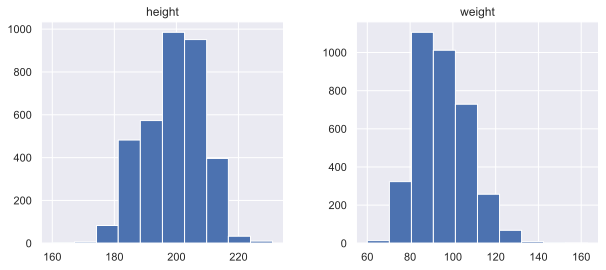

In [47]:
features = ["height", "weight"]
data[features].hist(figsize=(10, 4));

Росподіл ваги та зросту схожий на нормальний, але я деякі зсуви. Для зросту в бік 210 см, для ваги у бік 90 кг.

---

Подивимось на ці графіки в більш плавному виді

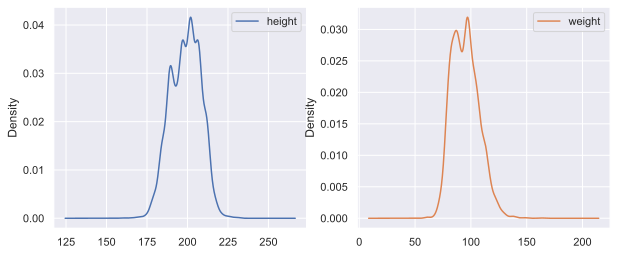

In [48]:
data[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

На цьому графіку помічаємо деяку нерівність. По зросту є 3 просідання частоти росподілу, для ваги є один. Можливо є якість норми по вазі для гравців. Хоч по вазі і можуть бути норми але зріст це неконтрольована характеристика людини)

---

Проаналізуємо ці змінні за допомогою `boxplot`. <br>
Для зросту:

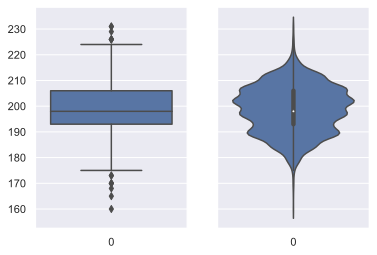

In [49]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=data["height"], ax=axes[0])
sns.violinplot(data=data["height"], ax=axes[1]);

В лівій частині бачимо явни викиди як з дуже високим так і з нвеликим зростом.
В правій частині бачимо цікавлячий нас графік росподілу на інтервалі (Q1−1.5⋅IQR,Q3+1.5⋅IQR). І тут так само він не плавний, а з явними просіданнями.

---

Тепер для ваги:

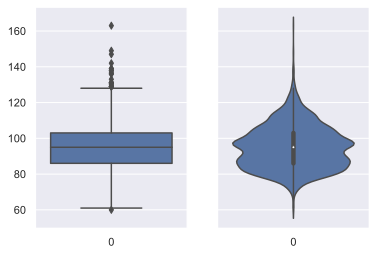

In [50]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=data["weight"], ax=axes[0])
sns.violinplot(data=data["weight"], ax=axes[1]);

Добре бачимо викиди в сторону більшої ваги в лівій частині. А в правій теж просідання десь в межах 90 кг.

---
<a name="3.2"/>

## 3.2. Візуалізація категоріальних та бінарних фічь
[зміст](#0)

Для початку зробимо нову фічу. Я хочу знати чи залежить від позиція гравця довго чи небагато часу він грав. <br> Створимо фічу `time_in_game`=`year_end`-`year_start` та `long_game`.<br> Знайду середнє. Все що меньше - **False**, все що більше - **True**.

In [51]:
data['time_in_game'] = data['year_end'] - data['year_start']

In [53]:
def long_game(row):
    if row > data['time_in_game'].mean():
        return True
    else:
        return False

In [54]:
data['long_game'] = data['time_in_game'].apply(long_game)
data.head()

,,birth_day,birth_month,year_start,year_end,position,college,height,weight,birth_city,birth_state,time_in_game,long_game
Player,born,,,,,,,,,,,,
Alaa Abdelnaby,1968,24,6,1991,1995,F-C,Duke University,208.0,108.0,Cairo,Egypt,4,False
Zaid Abdul-Aziz,1946,7,4,1969,1978,C-F,Iowa State University,206.0,106.0,Brooklyn,New York,9,True
Kareem Abdul-Jabbar,1947,16,4,1970,1989,C,"University of California, Los Angeles",NaN,NaN,NaN,NaN,19,True
Mahmoud Abdul-Rauf,1969,9,3,1991,2001,G,Louisiana State University,NaN,NaN,NaN,NaN,10,True
Tariq Abdul-Wahad,1974,3,11,1998,2003,F,San Jose State University,198.0,101.0,Maisons Alfort,France,5,True


Візуалізуємо позиції та довготривалість ігрової кар'єри гравців(`position`):

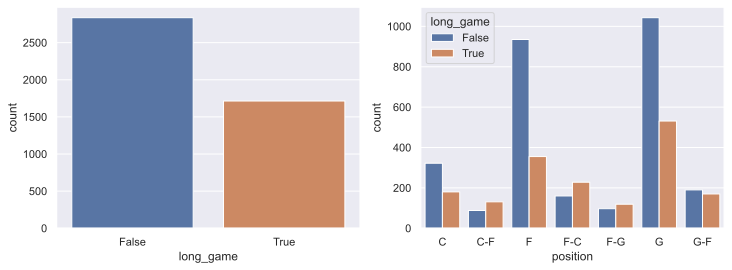

In [55]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="long_game", data=data, ax=axes[0])
sns.countplot(x="position", hue="long_game", data=data);

Виходячи з графіку можемо побачити деяку можливу залежність змінних. <br>
Для гравців на позиції F та G набагато більше гравців котрі недовго грали. Для гравців позиції С десь 1к2. Але для гравців позицій C-F, F-C, F-G, G-F довгограїв десь стільки ж та навіть більше.

---
<a name="3.3"/>

## 3.3. Багатофакторна візуалізація
[зміст](#0)

Візуалізуємо декілька змінних таблиці статистики ***seasons_stats***. <br>
Подивимось як коррелють змінні за допомогою `heatmap()` <br>
Наприклад, як коррелюють мыж собою такі фічі: Age, Year, 3P, 2P, FT, AST, STL, BLK, PF, PTS.

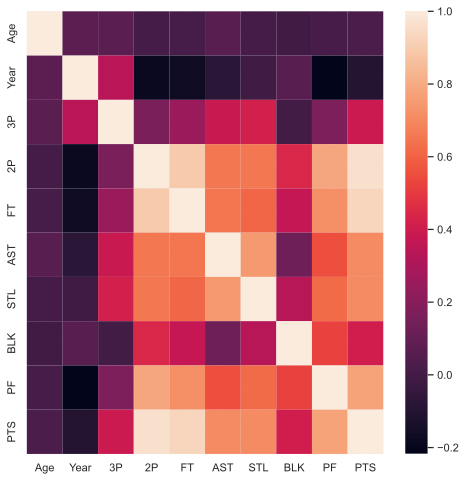

In [56]:
# Видалення нечислових змінних
numerical = [ 'Age', 'Year', '3P', '2P', 'FT', 'AST', 'STL', 'BLK', 'PF', 'PTS']

# Розрахувати та побудувати графік
sns.set (rc = {'figure.figsize':(8, 8)})
corr_matrix = seasons_stats[numerical].corr()
sns.heatmap(corr_matrix);

Бачимо як майже зовсім не корелює вік і сезон з усіма характеристиками окрім 3P, 3P-трьохочкові кидки. В них є деяка кореляція.<br> Велика корреляція у штрафних і 2х очкових. Та у загальних очках та 2х очкових, штрафних, передачах, перехопленнях, що не дивно) <br>

---

Подивимось на графіки взаємодій фіч за допомогою `Scatterplot matrix`

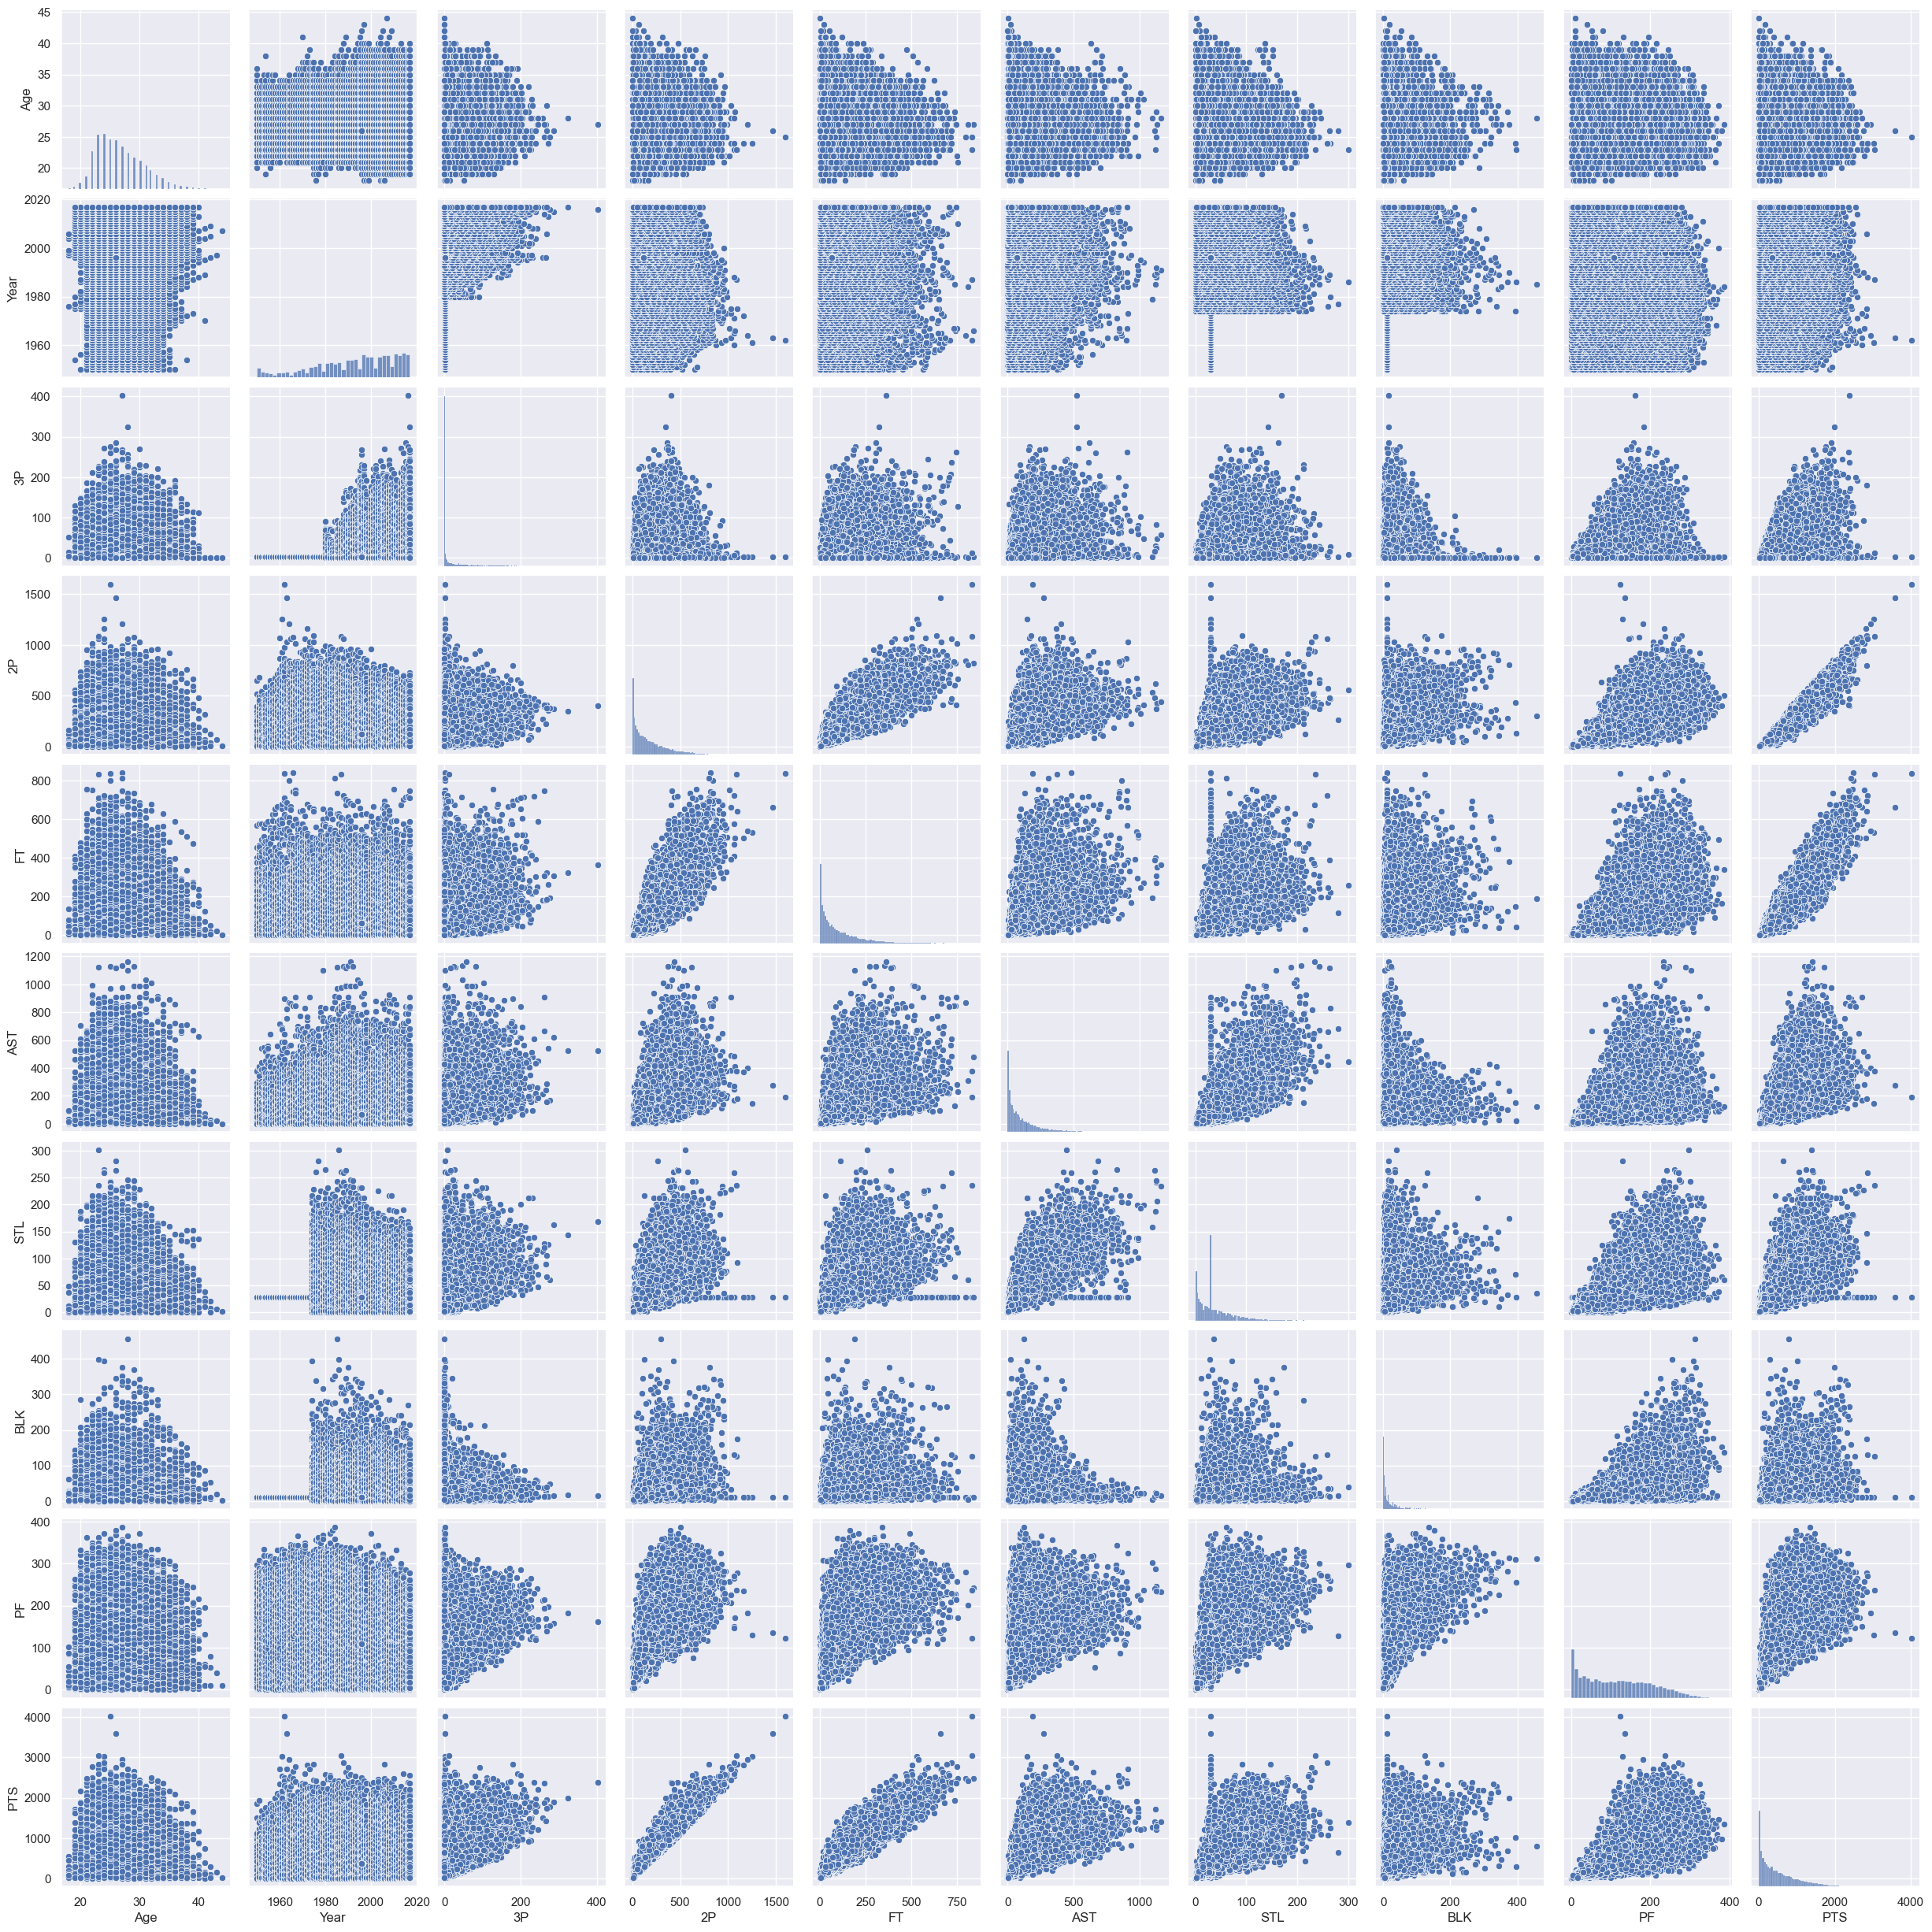

In [57]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(seasons_stats[numerical]);

По перше у всіх фічіф не нормальний росподіл. <br>
Видно що графіки задежності 3P, 2P, FT, AST, STL, BLK, PF, PTS мають нормальний росподіл на вік. З піком приблизно на 30 років. <br>
Бачимо лінійну залежність 2х очкових та штрафних.
Також кільність очок мають лінійний графік з 2x очковими та штрафними, але не з 3х очковими. <br>


---

### Дякую за увагу=)